# Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import cufflinks as cf
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import style
import plotly.express as px
cf.go_offline()
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

%matplotlib inline

# Importing the cleaned dataset

In [2]:
dataset = pd.read_csv("Cleaned data for forest fire.csv")

In [3]:
dataset

,Day,Month,Year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


The dataset contains data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria
and the Sidi Bel-abbes region located in the northwest of Algeria.

So we wil divide the dataset based on two region, and concate in a single dataframe

In [4]:
#Bejaia REgion Dataset
df_bejaia = pd.read_csv("Cleaned data for forest fire.csv")
df_bejaia = df_bejaia.iloc[:121,:]

#Creating a column with region category
df_bejaia["Region"] = "Bejaia"

In [5]:
df_bejaia.tail()

,Day,Month,Year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES,Region
116,25,9,2012,26,81,21,5.8,48.6,3.0,7.7,0.4,3.0,0.1,not fire,Bejaia
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,Bejaia
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,Bejaia
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,Bejaia
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,Bejaia


In [6]:
# For Sidi-Bel Abbes REgion Dataset

df_sidibel = pd.read_csv("Cleaned data for forest fire.csv")
df_sidibel = df_sidibel.iloc[121:,:]

#Creating a column with region category
df_sidibel["Region"] = 'Sidi Bel'
df_sidibel.head()

,Day,Month,Year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES,Region
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire,Sidi Bel
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,Sidi Bel
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,Sidi Bel
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,Sidi Bel
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,Sidi Bel


# Concatenating the two datasets into one

In [7]:
dataset = pd.concat([df_bejaia, df_sidibel], axis = 0, ignore_index = True)

In [8]:
dataset

,Day,Month,Year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi Bel
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,Sidi Bel
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi Bel
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi Bel


In [9]:
dataset["Region"].unique()

array(['Bejaia', 'Sidi Bel'], dtype=object)

#All looks Good so far

In [10]:
dataset.dtypes

Day              int64
Month            int64
Year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
CLASSES         object
Region          object
dtype: object

In [11]:
dataset.describe()

,Day,Month,Year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [12]:
dataset.isnull().sum()

Day            0
Month          0
Year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
CLASSES        0
Region         0
dtype: int64

In [58]:
dataset.to_csv('forest_fire_dataset_processed.csv', header=True, index=None)

# Splitting the dataset into Train and Test

In [13]:
X = dataset.drop(columns = ['CLASSES'])
y = dataset["CLASSES"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

# Creating dataframe with X_train and y_train for EDA

In [14]:
y_train = pd.DataFrame(y_train)

In [15]:
df = pd.concat([X_train, y_train], axis=1)
df = df.reset_index(drop= True)
df

,Day,Month,Year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,CLASSES
0,30,6,2012,33,50,14,0.0,88.7,22.9,92.8,7.2,28.3,12.9,Bejaia,fire
1,13,7,2012,34,81,15,0.0,81.8,9.7,37.2,3.0,11.7,3.4,Bejaia,not fire
2,24,9,2012,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7,Bejaia,not fire
3,15,7,2012,34,45,17,0.0,90.5,18.0,24.1,10.9,17.7,14.1,Sidi Bel,fire
4,9,9,2012,30,80,15,0.0,83.1,7.9,34.5,3.5,10.0,3.7,Sidi Bel,fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,27,8,2012,33,82,21,0.0,84.9,47.0,200.2,4.4,59.3,13.2,Bejaia,fire
190,12,9,2012,29,88,13,0.0,71.0,2.6,16.6,1.2,3.7,0.5,Bejaia,not fire
191,7,8,2012,32,69,16,0.0,86.5,15.5,48.6,5.5,17.2,8.0,Bejaia,fire
192,25,6,2012,31,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,Bejaia,fire


In [16]:
df.dtypes

Day              int64
Month            int64
Year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Region          object
CLASSES         object
dtype: object

In [17]:
df.isnull().sum()

Day            0
Month          0
Year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
CLASSES        0
dtype: int64

In [18]:
for i in df.columns:
    print(i, len(df[i].unique()))

Day 31
Month 4
Year 1
Temperature 19
RH 59
Ws 18
Rain 33
FFMC 150
DMC 141
DC 159
ISI 94
BUI 153
FWI 109
Region 2
CLASSES 2


Adding a new column 'day_name' using 'day', 'month', 'year' column
and  Converting the 'month' column to exact name of the month

In [19]:
df['day_name']=pd.to_datetime(df[['Day', 'Month', 'Year']]).apply(lambda x: x.strftime("%a"))
df['month']=pd.to_datetime(df[['Day', 'Month', 'Year']]).apply(lambda x: x.strftime("%b"))

# Visualizing the data

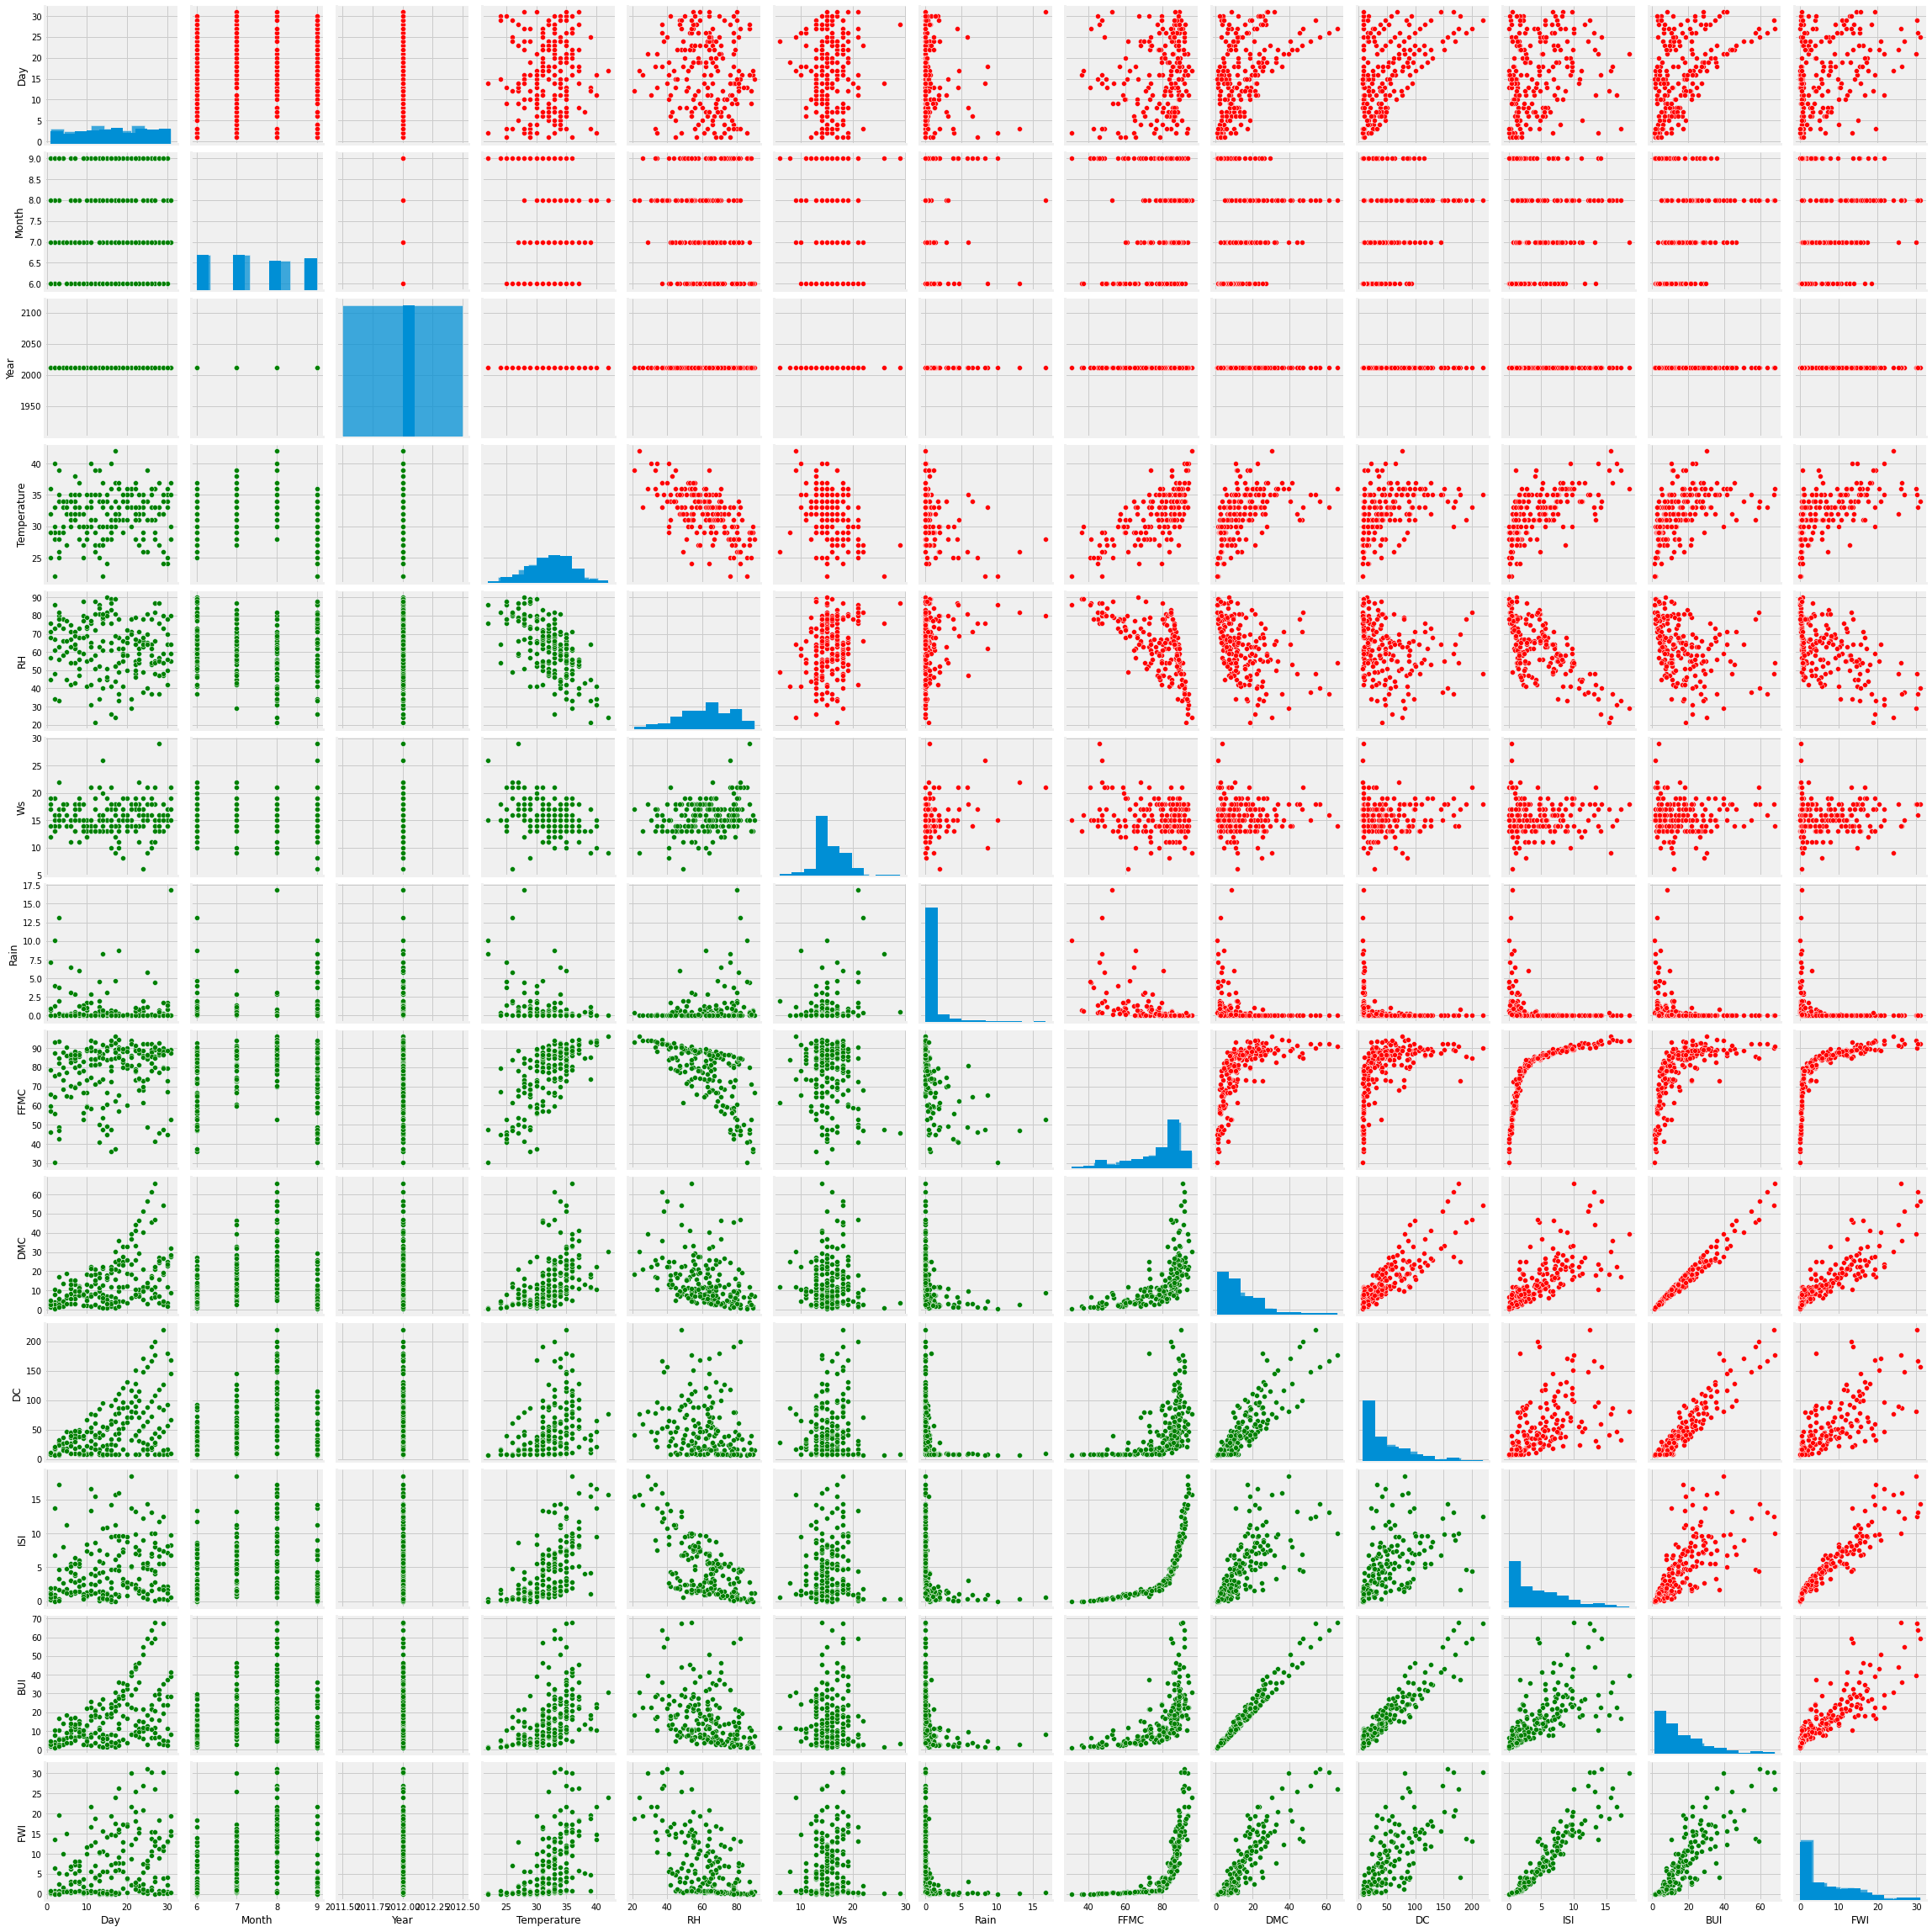

In [20]:
g = sns.pairplot(df)
g.map_upper(sns.scatterplot,color='red')
g.map_lower(sns.scatterplot, color='green')
g.map_diag(plt.hist)

Checking for imbalance

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='CLASSES', ylabel='count'>

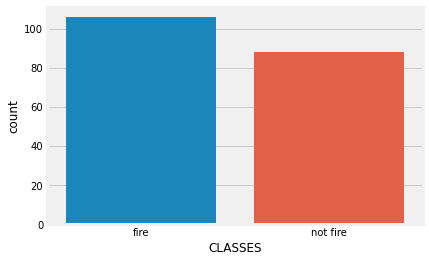

In [21]:
sns.countplot(df["CLASSES"])

CLASSES are not imbalanced

<AxesSubplot:xlabel='Region', ylabel='count'>

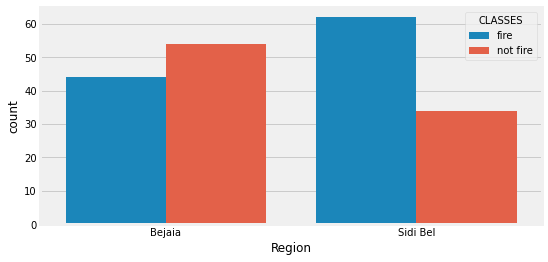

In [22]:
plt.figure(figsize = (8,4))
sns.countplot(x = df["Region"], hue = df["CLASSES"])

<Figure size 936x792 with 0 Axes>

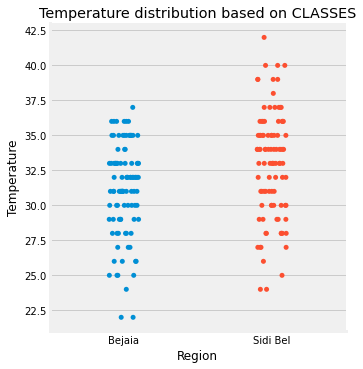

<Figure size 936x792 with 0 Axes>

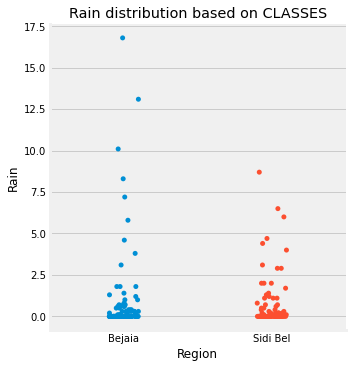

<Figure size 936x792 with 0 Axes>

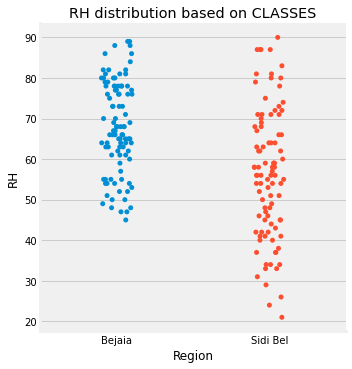

<Figure size 936x792 with 0 Axes>

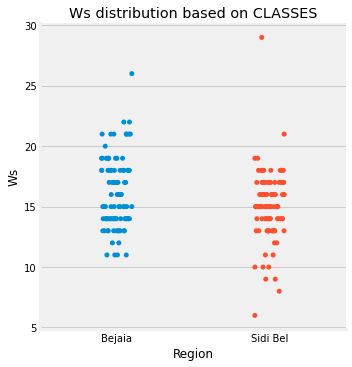

In [23]:
for i in ["Temperature", "Rain", "RH", "Ws"]:
    plt.figure(figsize=(13,11))
    sns.catplot(data = df, x = 'Region', y = i)
    plt.title(f'{i} distribution based on CLASSES')
    plt.show()

<AxesSubplot:xlabel='day_name', ylabel='count'>

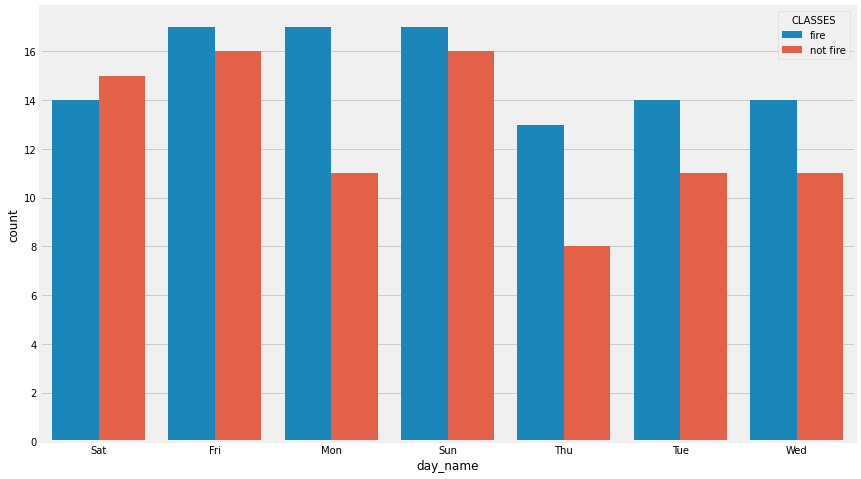

In [24]:
plt.figure(figsize = (13,8))
sns.countplot(x = df['day_name'], hue = df["CLASSES"])

Text(0.5, 1.0, 'Fire based on month and Region')

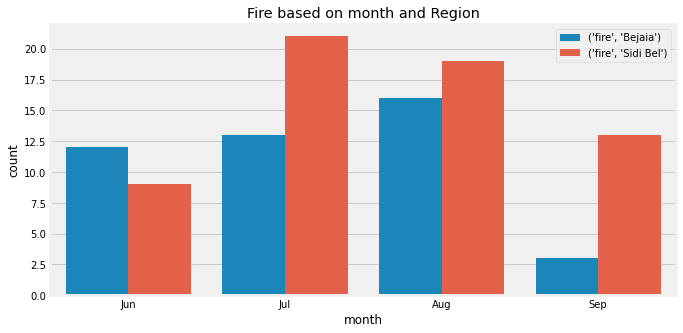

In [25]:
plt.figure(figsize=(10,5))
fire=df[df['CLASSES']=='fire']
sns.countplot(x=fire['month'], order=['Jun', 'Jul', 'Aug', 'Sep'], hue=fire[['CLASSES', 'Region']].apply(tuple, axis=1))
plt.title('Fire based on month and Region')

Text(0.5, 1.0, 'Fire based on day')

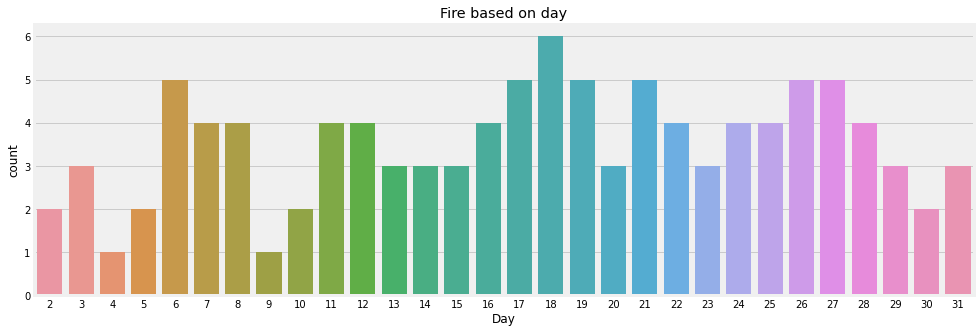

In [26]:
plt.figure(figsize= (15,5))
sns.countplot(x=df[df['CLASSES']=='fire']['Day'])
plt.title("Fire based on day")

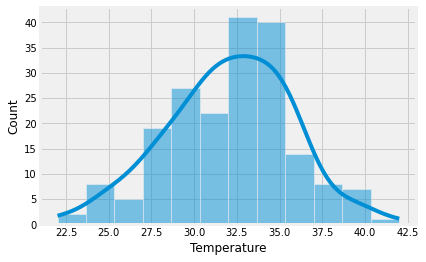

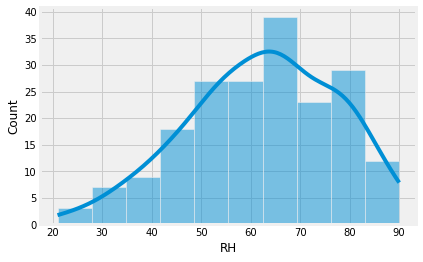

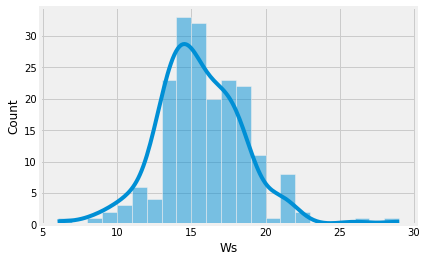

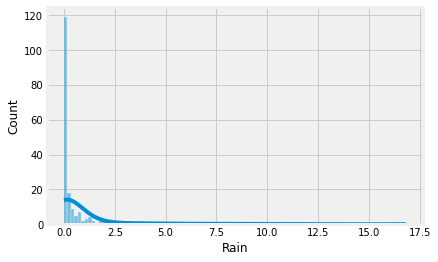

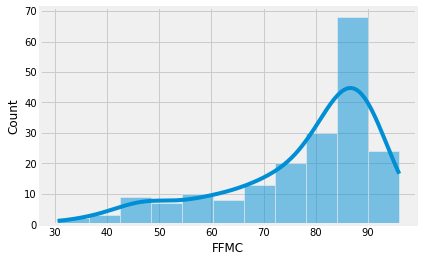

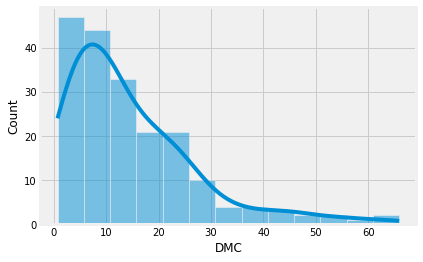

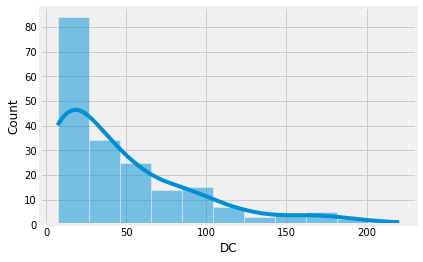

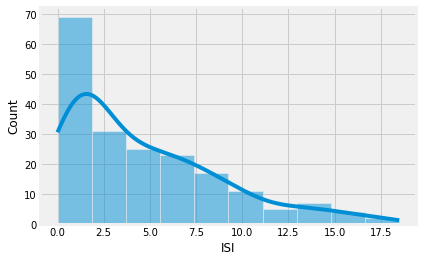

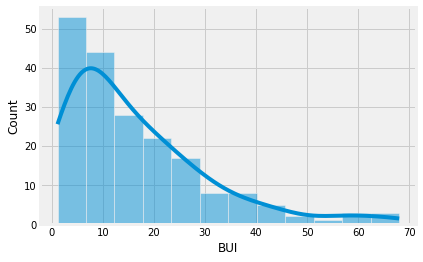

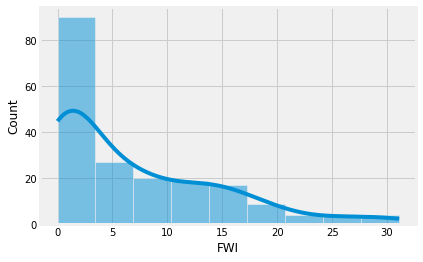

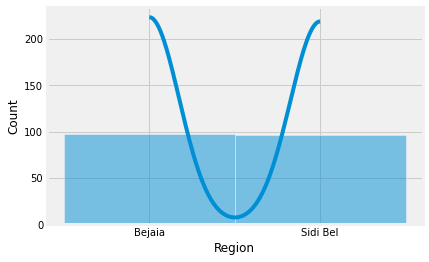

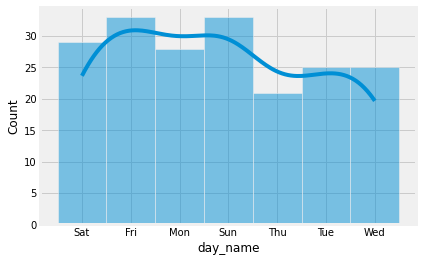

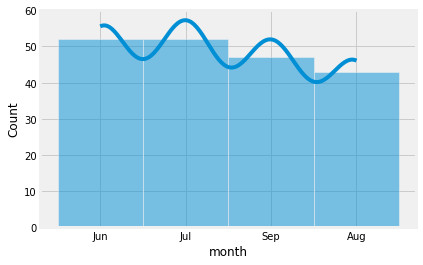

In [27]:
for column in df.drop(columns=['CLASSES', 'Year', 'Month', 'Day']):
    sns.histplot(df[column], kde=True)
    plt.show()

# We have to scale the data as there is variance

<Figure size 720x360 with 0 Axes>

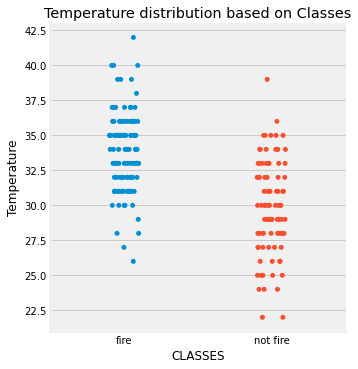

<Figure size 720x360 with 0 Axes>

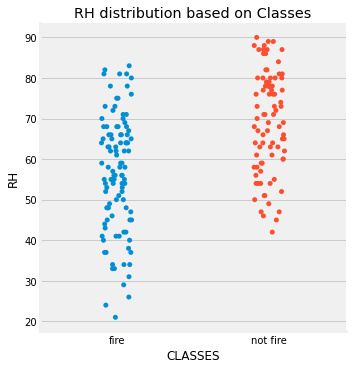

<Figure size 720x360 with 0 Axes>

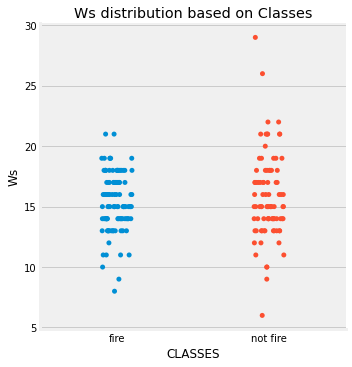

<Figure size 720x360 with 0 Axes>

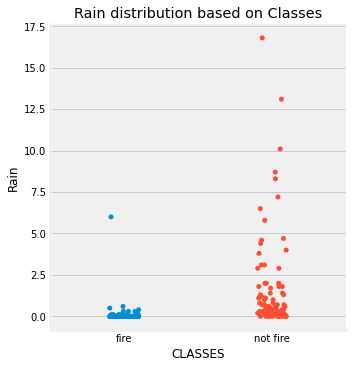

<Figure size 720x360 with 0 Axes>

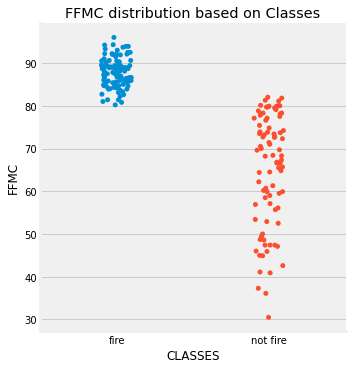

<Figure size 720x360 with 0 Axes>

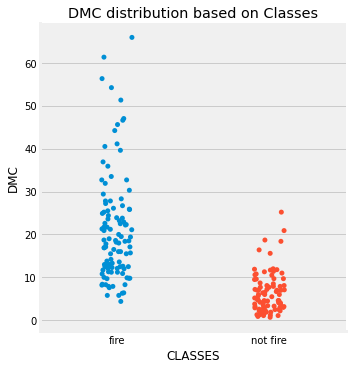

<Figure size 720x360 with 0 Axes>

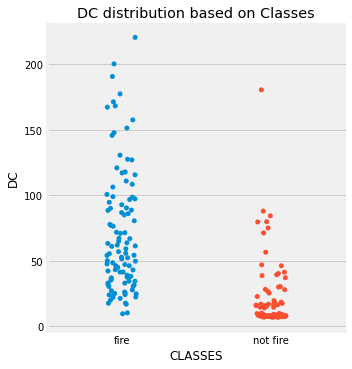

<Figure size 720x360 with 0 Axes>

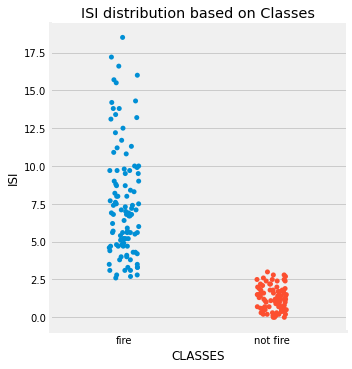

<Figure size 720x360 with 0 Axes>

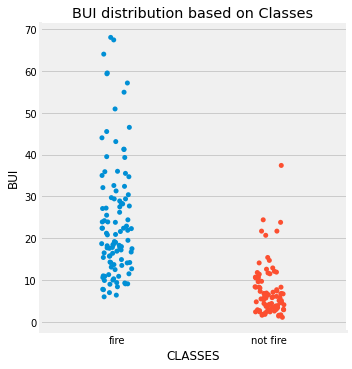

<Figure size 720x360 with 0 Axes>

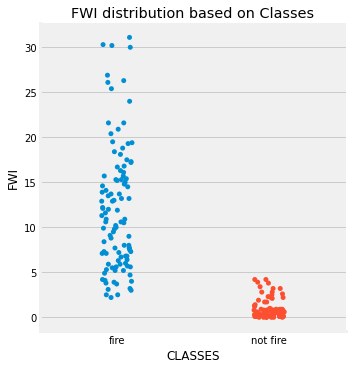

<Figure size 720x360 with 0 Axes>

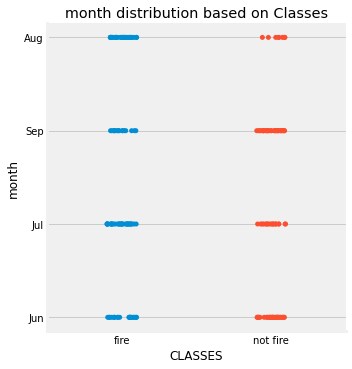

In [28]:
for column in df.drop(columns=['Day', 'Month', 'Year', 'day_name', 'Region', 'CLASSES']):
    plt.figure(figsize=(10,5))
    sns.catplot(data=df, x='CLASSES', y=column)
    plt.title(f'{column} distribution based on Classes')
    plt.show()

Dropping year and day column 

In [29]:
df1 = df.drop(columns= ['Year','Day'])
df1

,Month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,CLASSES,day_name,month
0,6,33,50,14,0.0,88.7,22.9,92.8,7.2,28.3,12.9,Bejaia,fire,Sat,Jun
1,7,34,81,15,0.0,81.8,9.7,37.2,3.0,11.7,3.4,Bejaia,not fire,Fri,Jul
2,9,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7,Bejaia,not fire,Mon,Sep
3,7,34,45,17,0.0,90.5,18.0,24.1,10.9,17.7,14.1,Sidi Bel,fire,Sun,Jul
4,9,30,80,15,0.0,83.1,7.9,34.5,3.5,10.0,3.7,Sidi Bel,fire,Sun,Sep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,8,33,82,21,0.0,84.9,47.0,200.2,4.4,59.3,13.2,Bejaia,fire,Mon,Aug
190,9,29,88,13,0.0,71.0,2.6,16.6,1.2,3.7,0.5,Bejaia,not fire,Wed,Sep
191,8,32,69,16,0.0,86.5,15.5,48.6,5.5,17.2,8.0,Bejaia,fire,Tue,Aug
192,6,31,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,Bejaia,fire,Mon,Jun


 Separating dataset into categorical and numerical column

In [30]:
categorical_dataframe = df1[['Month', 'day_name', 'CLASSES', 'Region']]

In [31]:
categorical_dataframe

,Month,day_name,CLASSES,Region
0,6,Sat,fire,Bejaia
1,7,Fri,not fire,Bejaia
2,9,Mon,not fire,Bejaia
3,7,Sun,fire,Sidi Bel
4,9,Sun,fire,Sidi Bel
...,...,...,...,...
189,8,Mon,fire,Bejaia
190,9,Wed,not fire,Bejaia
191,8,Tue,fire,Bejaia
192,6,Mon,fire,Bejaia


In [32]:
numerical_dataframe = df1.drop(columns =['Month', 'day_name', 'CLASSES', 'Region'])

In [33]:
numerical_dataframe

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,month
0,33,50,14,0.0,88.7,22.9,92.8,7.2,28.3,12.9,Jun
1,34,81,15,0.0,81.8,9.7,37.2,3.0,11.7,3.4,Jul
2,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7,Sep
3,34,45,17,0.0,90.5,18.0,24.1,10.9,17.7,14.1,Jul
4,30,80,15,0.0,83.1,7.9,34.5,3.5,10.0,3.7,Sep
...,...,...,...,...,...,...,...,...,...,...,...
189,33,82,21,0.0,84.9,47.0,200.2,4.4,59.3,13.2,Aug
190,29,88,13,0.0,71.0,2.6,16.6,1.2,3.7,0.5,Sep
191,32,69,16,0.0,86.5,15.5,48.6,5.5,17.2,8.0,Aug
192,31,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,Jun


# Outliers

In [34]:
numerical_dataframe.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,32.025773,62.262887,15.567010,0.826289,77.425773,14.623196,48.177835,4.703608,16.582474,7.039691
std,3.666733,14.970713,2.955305,2.171263,14.597542,12.394564,45.445267,4.195401,14.037714,7.601474
min,22.000000,21.000000,6.000000,0.000000,30.500000,0.700000,7.000000,0.000000,1.100000,0.000000
25%,30.000000,53.000000,14.000000,0.000000,70.125000,5.850000,11.350000,1.300000,6.125000,0.700000
50%,32.000000,63.500000,15.000000,0.000000,83.200000,11.250000,33.800000,3.300000,12.300000,4.150000
75%,35.000000,73.750000,17.000000,0.500000,88.175000,20.675000,70.050000,7.100000,22.400000,11.975000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,18.500000,68.000000,31.100000


<AxesSubplot:>

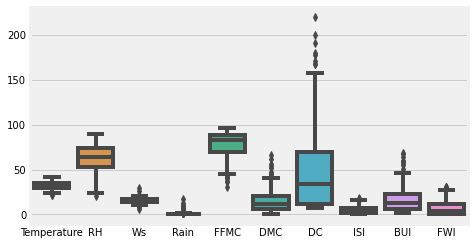

In [35]:
plt.figure(figsize=(7,4))
sns.boxplot(data = numerical_dataframe)

We are not removing anydata

# Correlation

<AxesSubplot:>

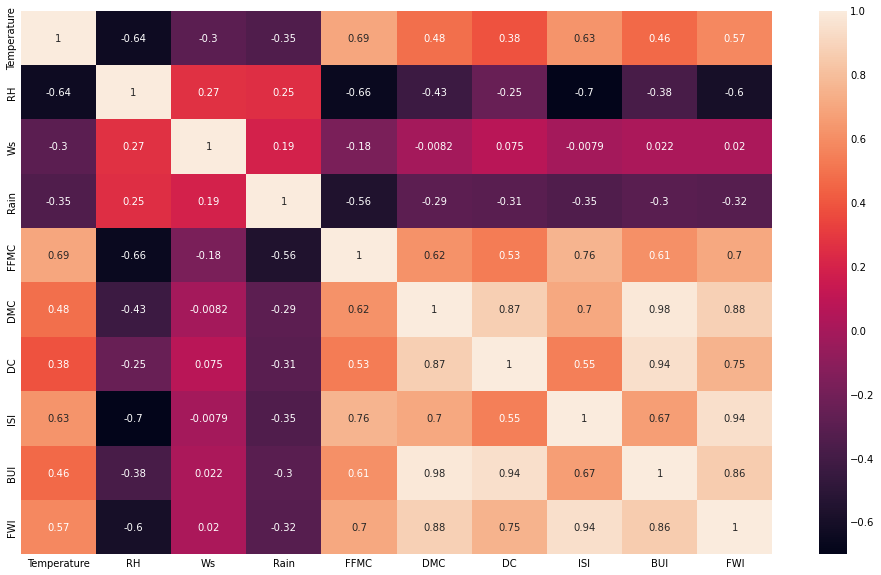

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(numerical_dataframe.corr(), annot= True)

We can see there is high correlation between BUI & DMC(0.98), BUI & DC(0.94), ISI & FWI(0.92)

In [37]:
numerical_dataframe = numerical_dataframe.drop(columns = ['BUI','FWI'])

In [38]:
numerical_dataframe = numerical_dataframe.drop(columns=['month'])

In [39]:
numerical_dataframe.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI
0,33,50,14,0.0,88.7,22.9,92.8,7.2
1,34,81,15,0.0,81.8,9.7,37.2,3.0
2,29,65,19,0.6,68.3,5.5,15.2,1.5
3,34,45,17,0.0,90.5,18.0,24.1,10.9
4,30,80,15,0.0,83.1,7.9,34.5,3.5


# Scaling

In [40]:
scaler = StandardScaler()
num_array1 = scaler.fit_transform(numerical_dataframe)

In [41]:
numerical_dataframe  = pd.DataFrame(num_array1, columns= numerical_dataframe.columns)

In [42]:
numerical_dataframe

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI
0,0.266381,-0.821244,-0.531608,-0.381541,0.774336,0.669505,0.984429,0.596570
1,0.539809,1.254823,-0.192358,-0.381541,0.300430,-0.398234,-0.242187,-0.407116
2,-0.827331,0.183304,1.164642,-0.104489,-0.626776,-0.737969,-0.727538,-0.765576
3,0.539809,-1.156094,0.486142,-0.381541,0.897963,0.273147,-0.531191,1.480770
4,-0.553903,1.187853,-0.192358,-0.381541,0.389717,-0.543834,-0.301753,-0.287630
...,...,...,...,...,...,...,...,...
189,0.266381,1.321793,1.843142,-0.381541,0.513344,2.618936,3.353826,-0.072554
190,-0.827331,1.723612,-0.870858,-0.381541,-0.441334,-0.972548,-0.696652,-0.837268
191,-0.007047,0.451184,0.146892,-0.381541,0.623235,0.070924,0.009314,0.190316
192,-0.280475,0.116334,-0.192358,-0.381541,0.636972,-0.034232,0.344647,0.238111


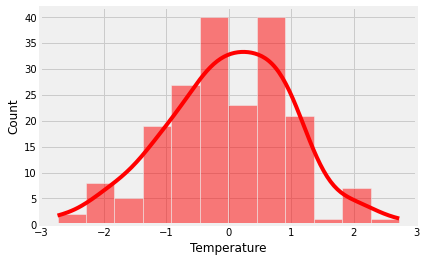

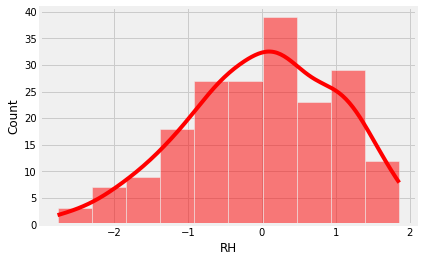

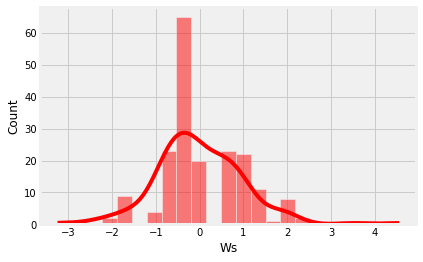

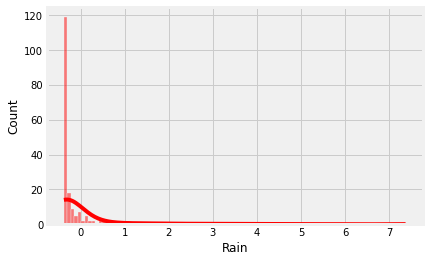

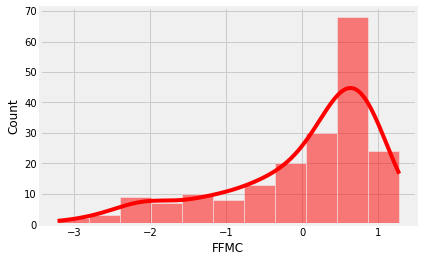

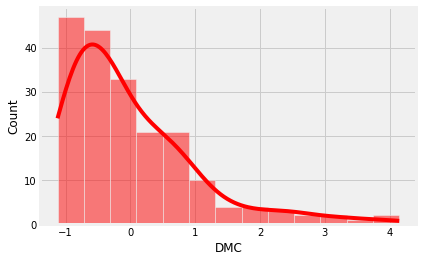

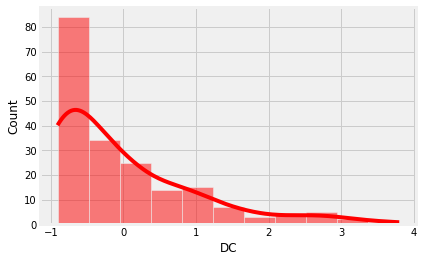

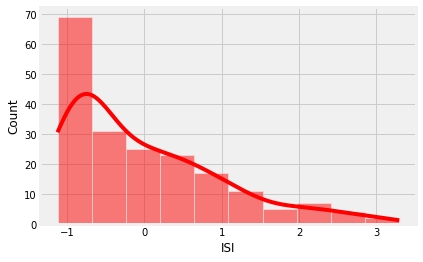

In [43]:
for column in numerical_dataframe:
    sns.histplot(numerical_dataframe[column], kde = True, color = "Red")
    plt.show()

We can see that there is not much change in the distribution after scaling

# Mapping of categorical variables



In [44]:
categorical_dataframe.head(2)

,Month,day_name,CLASSES,Region
0,6,Sat,fire,Bejaia
1,7,Fri,not fire,Bejaia


In [45]:
categorical_dataframe['Region'].unique()

array(['Bejaia', 'Sidi Bel'], dtype=object)

In [46]:
categorical_dataframe['Month'].unique()

array([6, 7, 9, 8], dtype=int64)

In [47]:
categorical_dataframe['Month']=categorical_dataframe['Month'].map({8:3, 7:2, 6:1, 9:0})  
categorical_dataframe['Region']=categorical_dataframe['Region'].map({'Sidi Bel':1, 'Bejaia':0})
categorical_dataframe['CLASSES']=categorical_dataframe['CLASSES'].map({'fire':1, 'not fire':0})

In [48]:
categorical_dataframe

,Month,day_name,CLASSES,Region
0,1,Sat,1,0
1,2,Fri,0,0
2,0,Mon,0,0
3,2,Sun,1,1
4,0,Sun,1,1
...,...,...,...,...
189,3,Mon,1,0
190,0,Wed,0,0
191,3,Tue,1,0
192,1,Mon,1,0


In [49]:
pip install -U scikit-learn

  Using cached scikit_learn-1.1.1-cp39-cp39-win_amd64.whl (7.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.24.2.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [53]:
encoder=OneHotEncoder(drop="first", sparse=False)
day_names_array=encoder.fit_transform(categorical_dataframe[['day_name']])
day_names=pd.DataFrame(day_names_array, columns=encoder.get_feature_names())
day_names

,x0_Mon,x0_Sat,x0_Sun,x0_Thu,x0_Tue,x0_Wed
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
189,1.0,0.0,0.0,0.0,0.0,0.0
190,0.0,0.0,0.0,0.0,0.0,1.0
191,0.0,0.0,0.0,0.0,1.0,0.0
192,1.0,0.0,0.0,0.0,0.0,0.0


In [54]:
categorical_dataframe = categorical_dataframe.drop(columns=['day_name'])
categorical_dataframe = pd.concat([categorical_dataframe, day_names], axis=1)
categorical_dataframe.head()

,Month,CLASSES,Region,x0_Mon,x0_Sat,x0_Sun,x0_Thu,x0_Tue,x0_Wed
0,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
3,2,1,1,0.0,0.0,1.0,0.0,0.0,0.0
4,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0


In [55]:
df1 = pd.concat([numerical_dataframe, categorical_dataframe], axis=1)
df1

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Month,CLASSES,Region,x0_Mon,x0_Sat,x0_Sun,x0_Thu,x0_Tue,x0_Wed
0,0.266381,-0.821244,-0.531608,-0.381541,0.774336,0.669505,0.984429,0.596570,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.539809,1.254823,-0.192358,-0.381541,0.300430,-0.398234,-0.242187,-0.407116,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.827331,0.183304,1.164642,-0.104489,-0.626776,-0.737969,-0.727538,-0.765576,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.539809,-1.156094,0.486142,-0.381541,0.897963,0.273147,-0.531191,1.480770,2,1,1,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.553903,1.187853,-0.192358,-0.381541,0.389717,-0.543834,-0.301753,-0.287630,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.266381,1.321793,1.843142,-0.381541,0.513344,2.618936,3.353826,-0.072554,3,1,0,1.0,0.0,0.0,0.0,0.0,0.0
190,-0.827331,1.723612,-0.870858,-0.381541,-0.441334,-0.972548,-0.696652,-0.837268,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
191,-0.007047,0.451184,0.146892,-0.381541,0.623235,0.070924,0.009314,0.190316,3,1,0,0.0,0.0,0.0,0.0,1.0,0.0
192,-0.280475,0.116334,-0.192358,-0.381541,0.636972,-0.034232,0.344647,0.238111,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
